## Exploring Olympic Data 2024( Exploratory Data Analysis EDA)

#### Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import plotly.express as px
import plotly.graph_objs as go

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Define the Olympic ring colors
olympic_colors = ['#0085C7', '#F4C300', '#000000', '#009F3D', '#DF0024']  # Blue, Yellow, Black, Green, Red

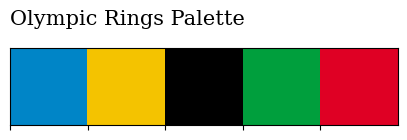

In [3]:
sns.palplot(olympic_colors)
plt.title("Olympic Rings Palette", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

### Athletes Data Analysis

In [4]:
athlete_df = pd.read_csv("athletes.csv")
athlete_df.head()

code               name     name_short            name_tv gender  \
0  1532872   ALEKSANYAN Artur   ALEKSANYAN A   Artur ALEKSANYAN   Male   
1  1532873     AMOYAN Malkhas       AMOYAN M     Malkhas AMOYAN   Male   
2  1532874    GALSTYAN Slavik     GALSTYAN S    Slavik GALSTYAN   Male   
3  1532944  HARUTYUNYAN Arsen  HARUTYUNYAN A  Arsen HARUTYUNYAN   Male   
4  1532945    TEVANYAN Vazgen     TEVANYAN V    Vazgen TEVANYAN   Male   

  function country_code  country country_full nationality  ...  \
0  Athlete          ARM  Armenia      Armenia     Armenia  ...   
1  Athlete          ARM  Armenia      Armenia     Armenia  ...   
2  Athlete          ARM  Armenia      Armenia     Armenia  ...   
3  Athlete          ARM  Armenia      Armenia     Armenia  ...   
4  Athlete          ARM  Armenia      Armenia     Armenia  ...   

                                              family  \
0                          Father, Gevorg Aleksanyan   
1                                                NaN   
2                                                NaN   
3  Wife, Diana (married October 2022). Daughter, ...   
4                 Wife, Sona (married November 2023)   

                         lang  \
0  Armenian, English, Russian   
1                    Armenian   
2                    Armenian   
3                    Armenian   
4           Armenian, Russian   

                                               coach  \
0                    Gevorg Aleksanyan (ARM), father   
1                                                NaN   
2  Personal: Martin Alekhanyan (ARM).<br>National...   
3                      National: Habetnak Kurghinyan   
4                National: Habetnak Kurghinyan (ARM)   

                                              reason  \
0  He followed his father and his uncle into the ...   
1                                                NaN   
2                                                NaN   
3  While doing karate he noticed wrestlers traini...   
4  “My family did not like wrestling very much. A...   

                                                hero  \
0  Footballer Zinedine Zidane (FRA), World Cup wi...   
1                                                NaN   
2                                                NaN   
3  Wrestler Armen Nazaryan (ARM, BUL), two-time O...   
4                                                NaN   

                       influence  \
0  His father, Gevorg Aleksanyan   
1                            NaN   
2                            NaN   
3                            NaN   
4                            NaN   

                                          philosophy  \
0  "Wrestling is my life." (mediamax.am. 18 May 2...   
1  "To become a good athlete, you first have to b...   
2                                                NaN   
3  “Nothing is impossible, set goals in front of ...   
4                                                NaN   

                                  sporting_relatives ritual other_sports  
0                                                NaN    NaN          NaN  
1  Uncle, Roman Amoyan (wrestling), 2008 Olympic ...    NaN          NaN  
2                                                NaN    NaN          NaN  
3                                                NaN    NaN          NaN  
4                                                NaN    NaN          NaN  

[5 rows x 35 columns]

In [5]:
athlete_df.columns

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date', 'birth_place', 'birth_country',
       'residence_place', 'residence_country', 'nickname', 'hobbies',
       'occupation', 'education', 'family', 'lang', 'coach', 'reason', 'hero',
       'influence', 'philosophy', 'sporting_relatives', 'ritual',
       'other_sports'],
      dtype='object')

In [6]:
athlete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11110 entries, 0 to 11109
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   code                11110 non-null  int64  
 1   name                11110 non-null  object 
 2   name_short          11110 non-null  object 
 3   name_tv             11110 non-null  object 
 4   gender              11110 non-null  object 
 5   function            11110 non-null  object 
 6   country_code        11110 non-null  object 
 7   country             11110 non-null  object 
 8   country_full        11110 non-null  object 
 9   nationality         11091 non-null  object 
 10  nationality_full    11091 non-null  object 
 11  nationality_code    11091 non-null  object 
 12  height              11110 non-null  int64  
 13  weight              11092 non-null  float64
 14  disciplines         11110 non-null  object 
 15  events              11110 non-null  object 
 16  birt

### Data Cleaning

In [7]:
# Drop rows with NaN values in height or weight
athlete_df = athlete_df.dropna(subset=['height', 'weight'])

Text(0, 0.5, 'Density')

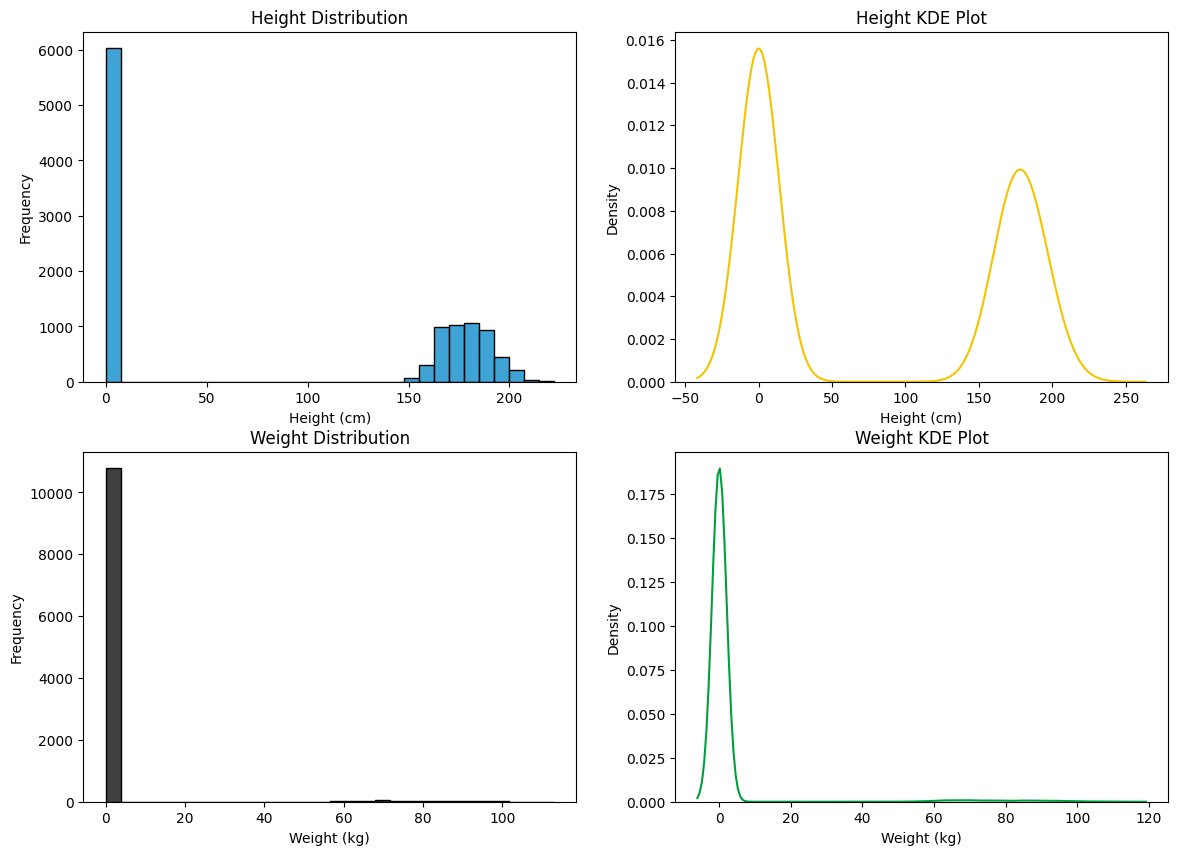

In [15]:
# Set up the figure and axes
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram for height
sns.histplot(athlete_df['height'], bins=30, kde=False, ax=axs[0, 0], color=olympic_colors[0])
axs[0, 0].set_title('Height Distribution')
axs[0, 0].set_xlabel('Height (cm)')
axs[0, 0].set_ylabel('Frequency')

# KDE plot for height
sns.kdeplot(athlete_df['height'], ax=axs[0, 1], color=olympic_colors[1])
axs[0, 1].set_title('Height KDE Plot')
axs[0, 1].set_xlabel('Height (cm)')
axs[0, 1].set_ylabel('Density')

# Histogram for weight
sns.histplot(athlete_df['weight'], bins=30, kde=False, ax=axs[1, 0], color=olympic_colors[2])
axs[1, 0].set_title('Weight Distribution')
axs[1, 0].set_xlabel('Weight (kg)')
axs[1, 0].set_ylabel('Frequency')

# KDE plot for weight
sns.kdeplot(athlete_df['weight'], ax=axs[1, 1], color=olympic_colors[3])
axs[1, 1].set_title('Weight KDE Plot')
axs[1, 1].set_xlabel('Weight (kg)')
axs[1, 1].set_ylabel('Density')


<Figure size 640x480 with 0 Axes>

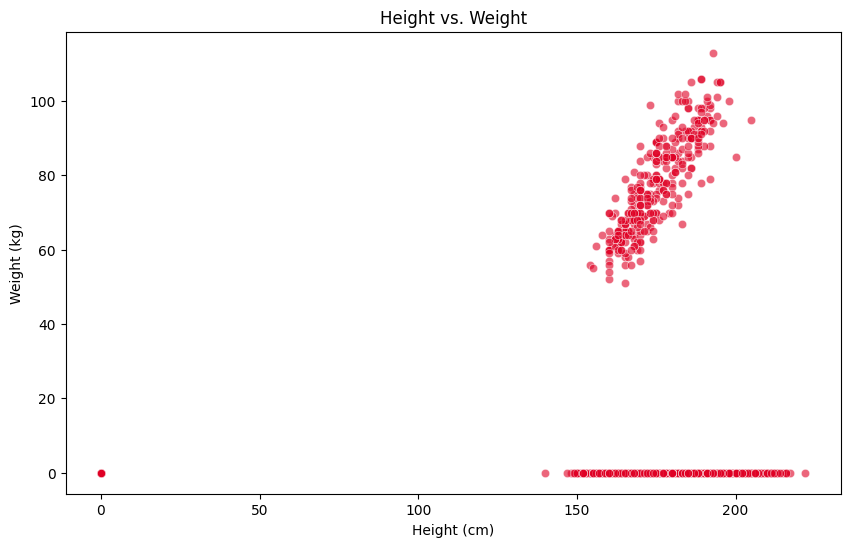

In [16]:
# Adjust layout
plt.tight_layout()
plt.show()

# Scatter plot for height vs. weight
plt.figure(figsize=(10, 6))
sns.scatterplot(data=athlete_df, x='height', y='weight', alpha=0.6, color=olympic_colors[4])
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

#### Age Distribution:

In [17]:
athlete_df['birth_date'].head()

0    1991-10-21
1    1999-01-22
2    1996-12-21
3    1999-11-22
4    1999-10-27
Name: birth_date, dtype: object

In [18]:
# Convert birth_date to datetime format
athlete_df['birth_date'] = pd.to_datetime(athlete_df['birth_date'])

# Calculate age of each athlete
def calculate_age(birth_date):
    today = datetime.today()
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age

athlete_df['age'] = athlete_df['birth_date'].apply(calculate_age)

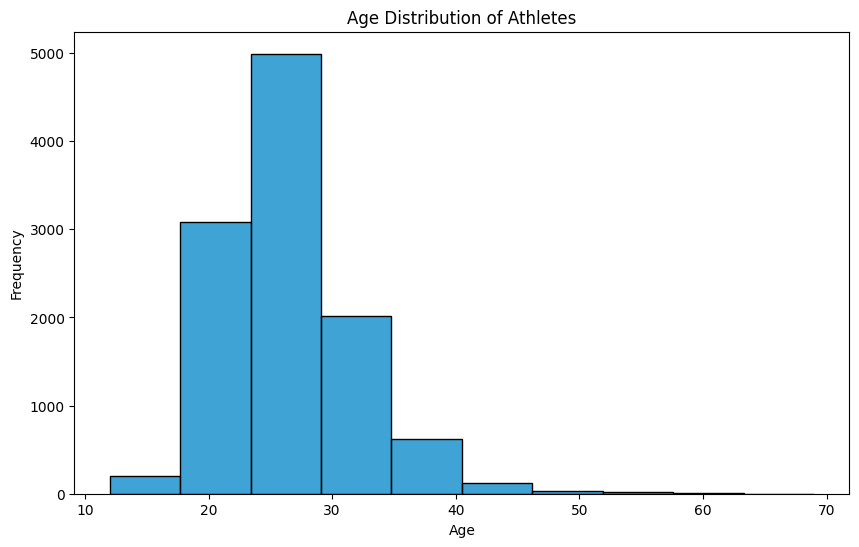

In [19]:
# Plot the age distribution
plt.figure(figsize=(10, 6))
sns.histplot(athlete_df['age'], bins=10, kde=False, color='#0085C7')  # Using one of the Olympic colors
plt.title('Age Distribution of Athletes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### Gender Distribution:

In [22]:
gender = athlete_df['gender']

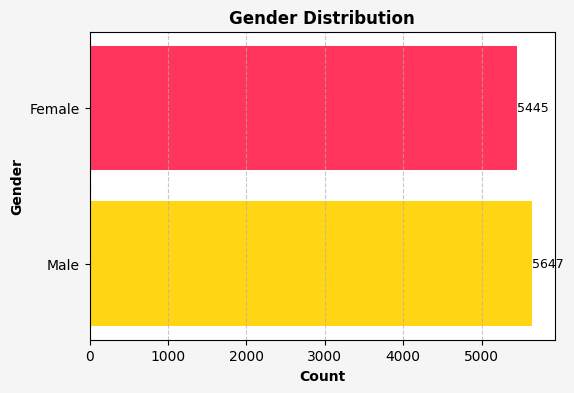

In [23]:
# Count the number of occurrences of each gender
gender_counts = gender.value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(6, 4), facecolor='#f6f5f5')

# Plot horizontal bar chart
plt.barh(gender_counts.index, gender_counts.values, color=['#ffd514', '#ff355d'])

# Add labels and title
plt.xlabel('Count', fontsize=10, weight='bold')
plt.ylabel('Gender', fontsize=10, weight='bold')
plt.title('Gender Distribution', fontsize=12, weight='bold')

# Add value labels to bars
for index, value in enumerate(gender_counts.values):
    plt.text(value, index, f'{value}', va='center', fontsize=9, color='black')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Country Participation:

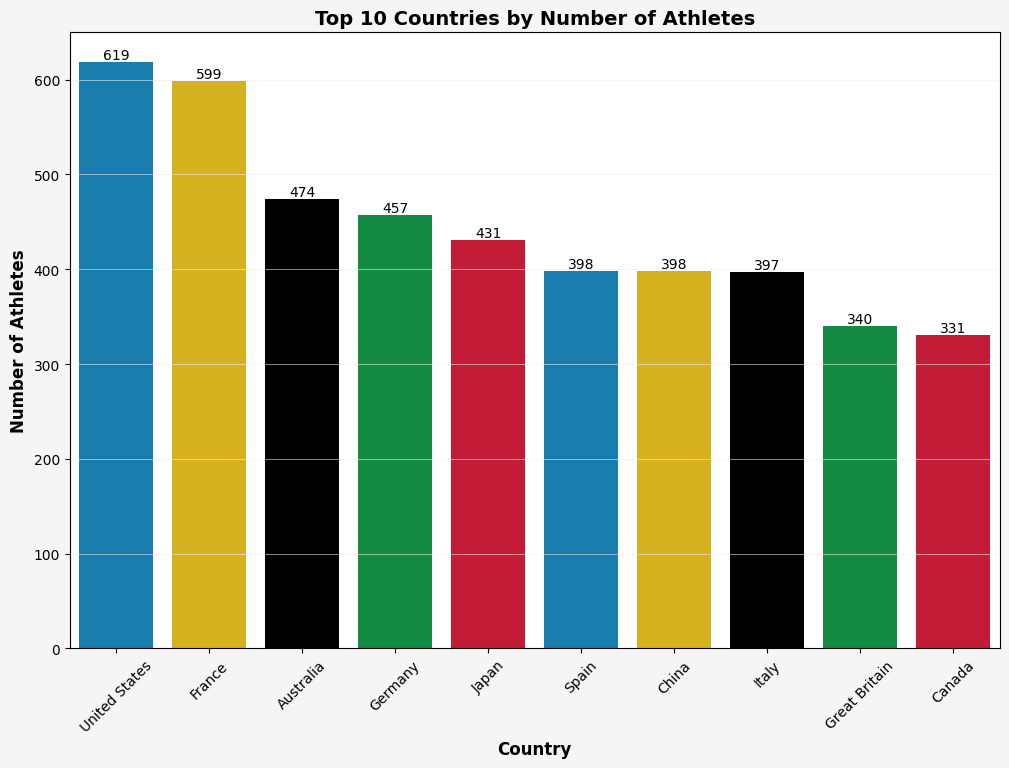

In [21]:
# Count the number of athletes from each country
country_counts = athlete_df['country'].value_counts()

# Select the top 10 countries based on athlete count
top_10_countries = country_counts.nlargest(10)

# Plot the bar chart for number of athletes by top 10 countries
plt.figure(figsize=(12, 8), facecolor='#f6f5f5')

# Create the bar plot with the Olympic color palette
ax = sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette=olympic_colors)

# Customize the plot
ax.set_xlabel('Country', fontsize=12, weight='bold')
ax.set_ylabel('Number of Athletes', fontsize=12, weight='bold')
ax.set_title('Top 10 Countries by Number of Athletes', fontsize=14, weight='bold')

ax.grid(which='major', axis='y', color='#EEEEEE', linewidth=0.4)

# Add the value labels
for p in ax.patches:
    value = f'{p.get_height():.0f}'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, value, ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.show()

#### Participation per Discipline:

In [25]:
teams = pd.read_csv("teams.csv")
discipline_counts = teams['discipline']

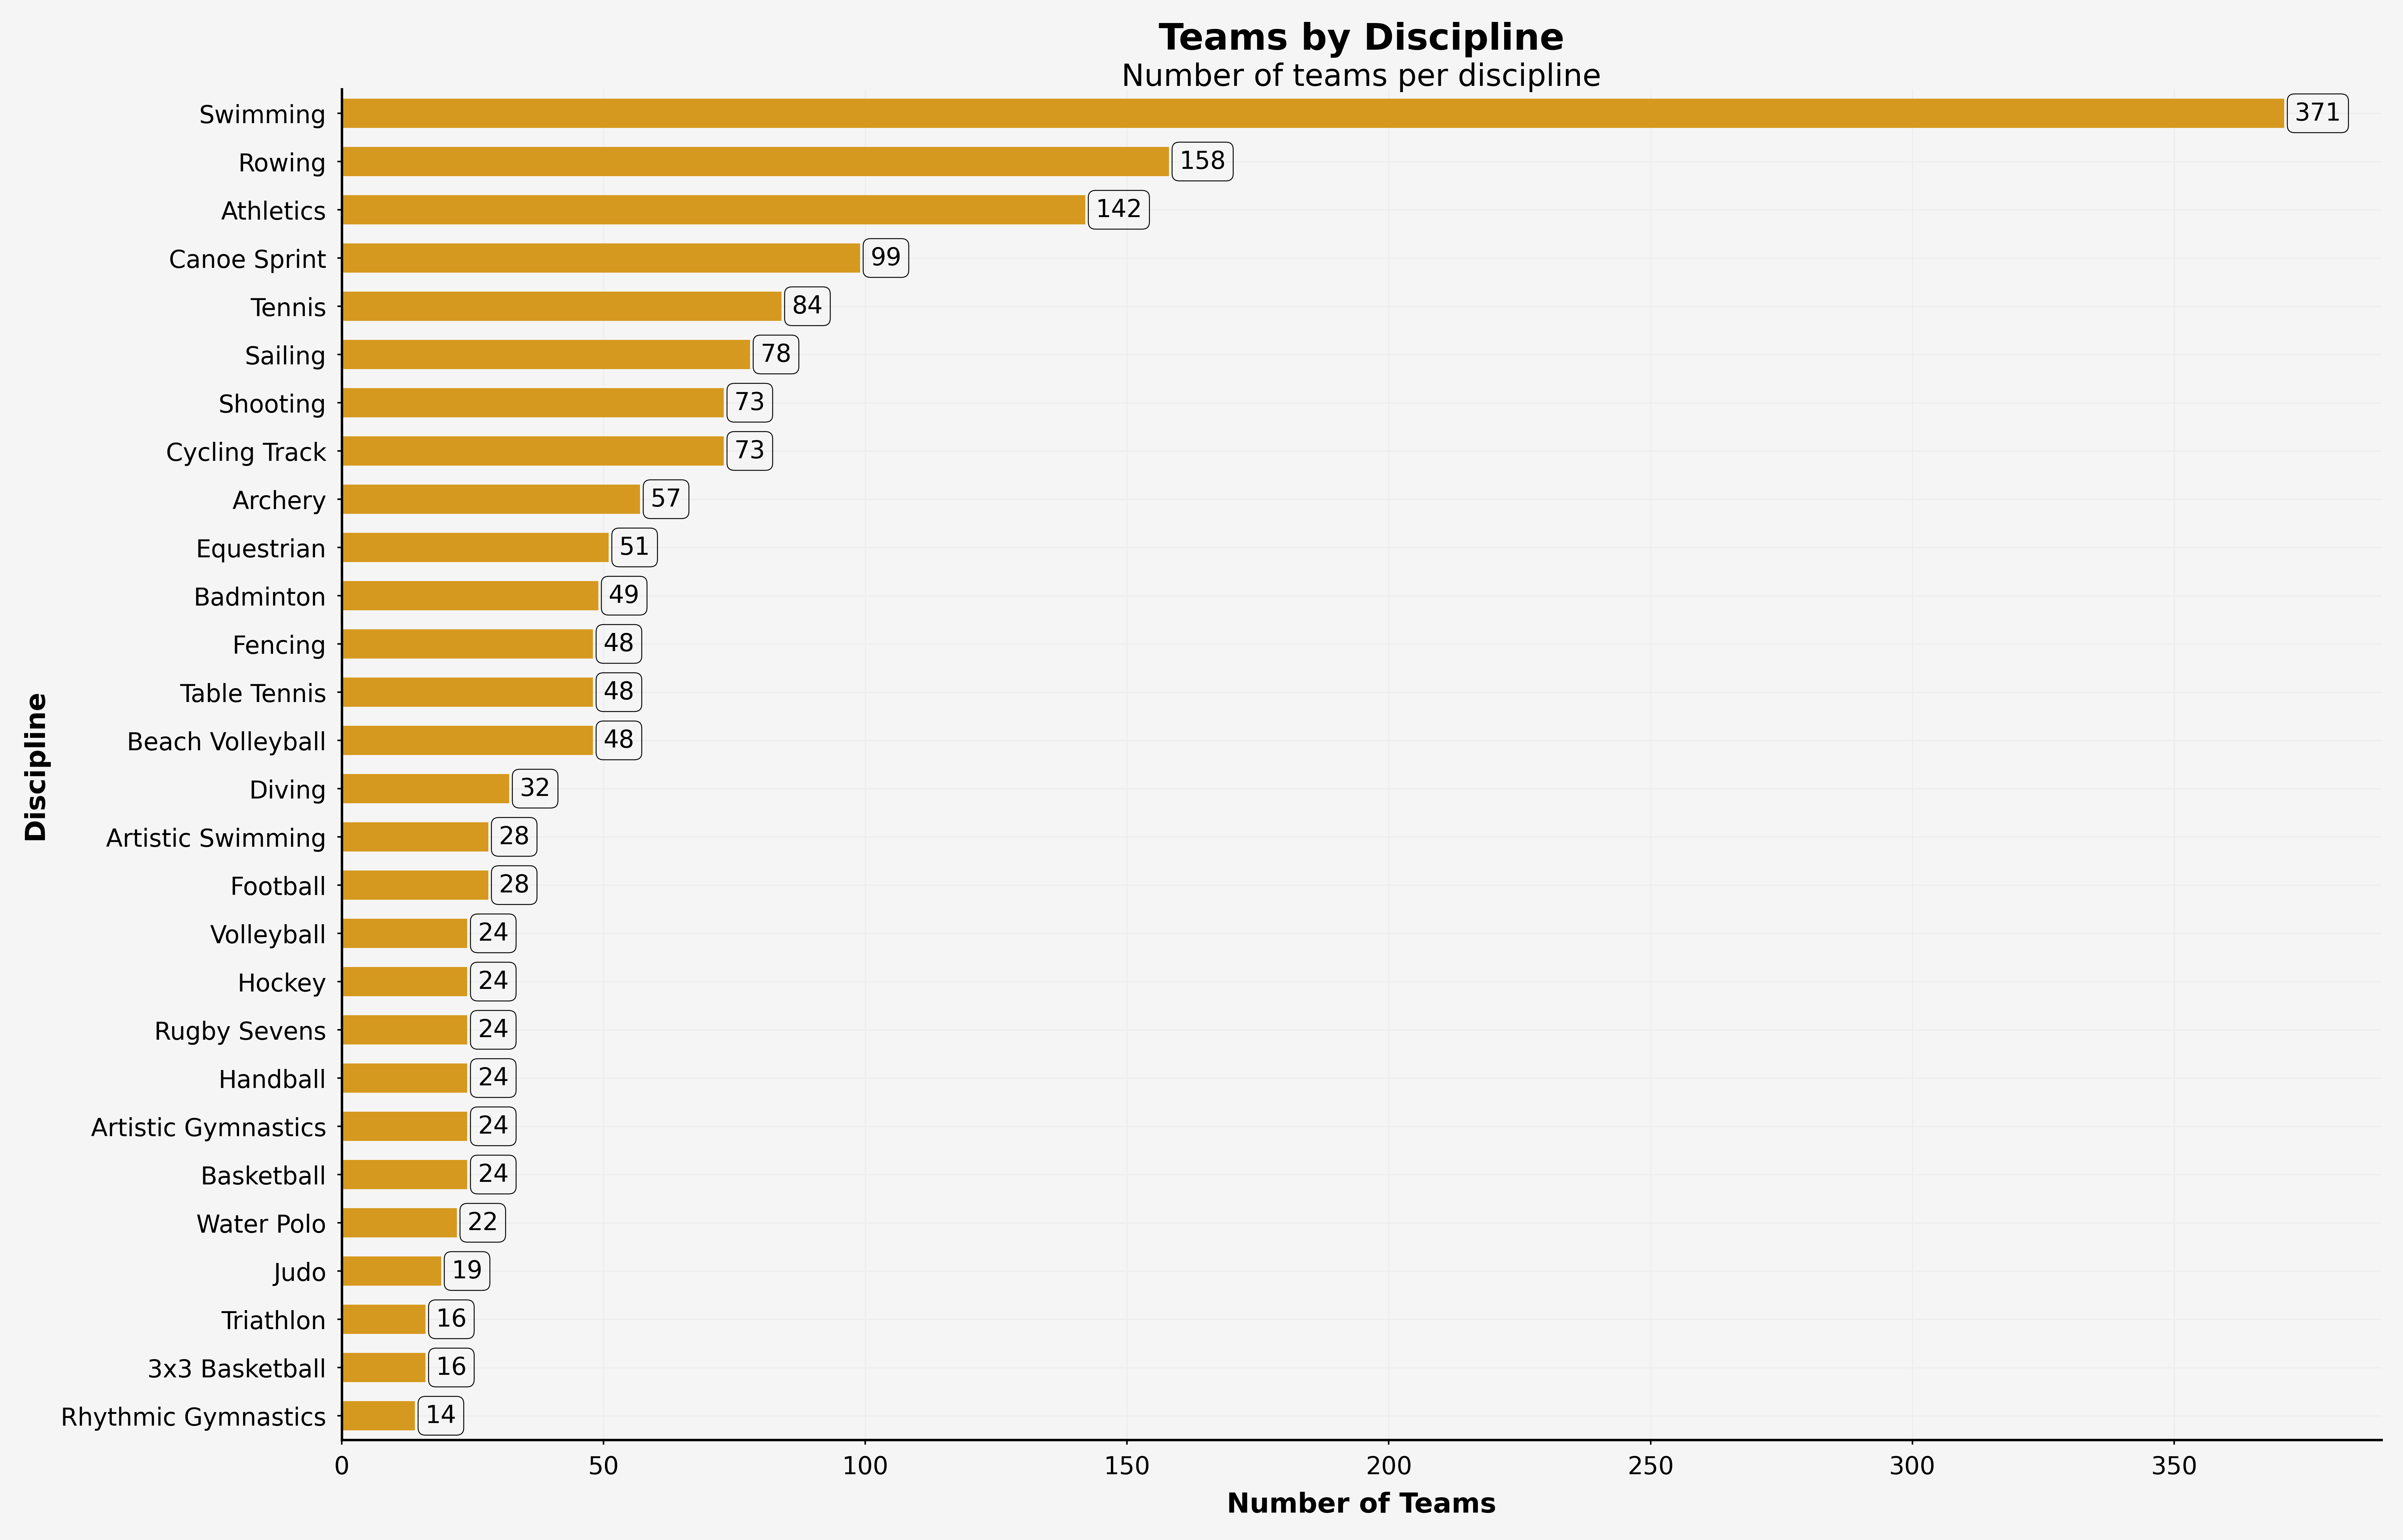

In [26]:
# Count the number of teams by discipline
discipline_counts = teams['discipline'].value_counts()

# Plot horizontal bar chart
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(12, 8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(sns.color_palette([
    '#f5a300', '#d73c45', '#5c5b5b', '#009B77', '#F4A300',
    '#00A3E0', '#C8102E', '#E5E5E5', '#007A33', '#F9A11B'
]))
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)

ax0.set_facecolor(background_color)

# Bar plot for number of teams by discipline
ax0_sns = sns.barplot(y=discipline_counts.index, x=discipline_counts.values, ax=ax0, zorder=2, width=0.6)
ax0_sns.set_xlabel('Number of Teams', fontsize=9, weight='bold')
ax0_sns.set_ylabel('Discipline', fontsize=9, weight='bold')

ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=8, width=0.5, length=1.5)

# Annotate bars with counts
for p in ax0_sns.patches:
    value = f'{p.get_width():.0f}'
    x = p.get_x() + p.get_width() + 2
    y = p.get_y() + p.get_height() / 2 
    ax0.text(x, y, value, ha='left', va='center', fontsize=8, 
             bbox=dict(facecolor='none', edgecolor='black', boxstyle='round', linewidth=0.3))

# Title and annotations
ax0_sns.text(0.5, 1.05, 'Teams by Discipline', fontsize=12, weight='bold', ha='center', va='top', transform=ax0.transAxes)
ax0_sns.text(0.5, 1.02, 'Number of teams per discipline', fontsize=10, ha='center', va='top', transform=ax0.transAxes)

plt.show()

#### Events Timeline

In [28]:
schedule = pd.read_csv("schedules.csv")
schedule.head()

start_date                   end_date         day    status  \
0  2024-07-24T15:00:00+02:00  2024-07-24T16:45:00+02:00  2024-07-24  FINISHED   
1  2024-07-24T15:00:00+02:00  2024-07-24T16:45:00+02:00  2024-07-24  FINISHED   
2  2024-07-24T15:30:00+02:00  2024-07-24T15:46:00+02:00  2024-07-24  FINISHED   
3  2024-07-24T16:00:00+02:00  2024-07-24T16:16:00+02:00  2024-07-24  FINISHED   
4  2024-07-24T16:30:00+02:00  2024-07-24T16:46:00+02:00  2024-07-24  FINISHED   

     discipline discipline_code event  event_medal          phase gender  \
0      Football             FBL   Men            0  Men's Group B      M   
1      Football             FBL   Men            0  Men's Group C      M   
2  Rugby Sevens             RU7   Men            0   Men's Pool B      M   
3  Rugby Sevens             RU7   Men            0   Men's Pool B      M   
4  Rugby Sevens             RU7   Men            0   Men's Pool C      M   

  event_type                      venue venue_code  \
0      HTEAM  Geoffroy-Guichard Stadium        STE   
1      HTEAM           Parc des Princes        PDP   
2      HTEAM            Stade de France        STA   
3      HTEAM            Stade de France        STA   
4      HTEAM            Stade de France        STA   

                       location_description location_code  \
0  Geoffroy-Guichard Stadium, Saint-Etienne           STE   
1                   Parc des Princes, Paris           PDP   
2                           Stade de France           STA   
3                           Stade de France           STA   
4                           Stade de France           STA   

                                                 url  
0   /en/paris-2024/results/football/men/gpb-000100--  
1   /en/paris-2024/results/football/men/gpc-000100--  
2  /en/paris-2024/results/rugby-sevens/men/gpb-00...  
3  /en/paris-2024/results/rugby-sevens/men/gpb-00...  
4  /en/paris-2024/results/rugby-sevens/men/gpc-00...

In [29]:
schedule.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3895 entries, 0 to 3894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   start_date            3895 non-null   object
 1   end_date              3893 non-null   object
 2   day                   3895 non-null   object
 3   status                3895 non-null   object
 4   discipline            3895 non-null   object
 5   discipline_code       3895 non-null   object
 6   event                 3893 non-null   object
 7   event_medal           3895 non-null   int64 
 8   phase                 3893 non-null   object
 9   gender                3893 non-null   object
 10  event_type            3893 non-null   object
 11  venue                 3893 non-null   object
 12  venue_code            3893 non-null   object
 13  location_description  3893 non-null   object
 14  location_code         3893 non-null   object
 15  url                   3810 non-null   

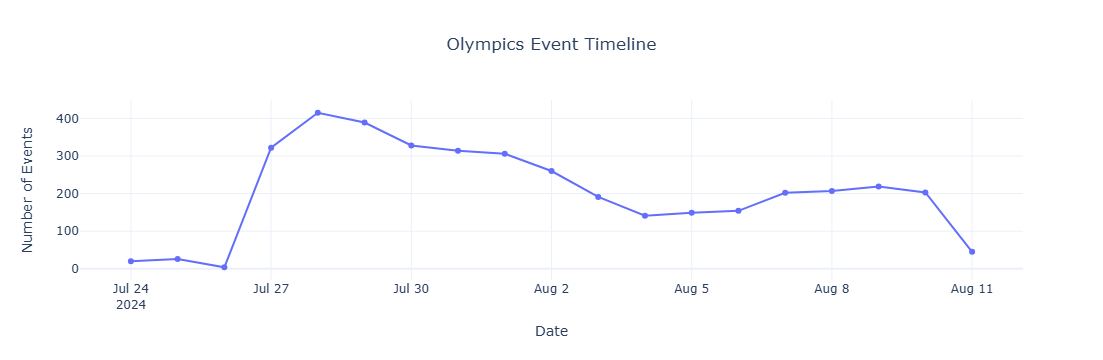

In [30]:
schedule['start_date'] = pd.to_datetime(schedule['start_date'])
schedule['end_date'] = pd.to_datetime(schedule['end_date'])

# Extract date part for aggregation
schedule['date'] = schedule['start_date'].dt.date

event_counts = schedule.groupby('date').size().reset_index(name='event_count')

# Plotting the timeline of events
fig = px.line(event_counts, x='date', y='event_count', 
              title='Olympics Event Timeline',
              labels={'date': 'Date', 'event_count': 'Number of Events'},
              markers=True)

fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Events",
    title_x=0.5,
    template='plotly_white'
)

fig.show()

#### Results/Medals:

In [31]:
medals = pd.read_csv("medals_total.csv")
medals.head()

country_code  Gold Medal  Silver Medal  Bronze Medal  Total
0          USA          40            44            42    126
1          CHN          40            27            24     91
2          JPN          20            12            13     45
3          AUS          18            19            16     53
4          FRA          16            26            22     64

In [32]:
medals.columns

Index(['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal', 'Total'], dtype='object')

In [33]:
plt.rcParams['figure.dpi'] = 600

fig = plt.figure(figsize=(30, 12), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=1.5, hspace=0.05)

background_color = "#f6f5f5"
sns.set_palette(['#FFD700', '#C0C0C0', '#CD7F32'])
ax0 = fig.add_subplot(gs[0, 0])

for s in ["right", "top"]:
    ax0.spines[s].set_visible(False)
    
ax0.set_facecolor(background_color)

# Convert to vertical bar plot
ax0_sns = medals.plot(x='country_code', y=['Gold Medal', 'Silver Medal', 'Bronze Medal'], kind='bar', ax=ax0, zorder=2, width=0.8)

ax0_sns.set_xlabel('Team Name', fontsize=10, weight='bold')
ax0_sns.set_ylabel('Medals Count', fontsize=10, weight='bold')

ax0_sns.grid(which='major', axis='y', zorder=0, color='#EEEEEE', linewidth=0.4)
ax0_sns.grid(which='major', axis='x', zorder=0, color='#EEEEEE', linewidth=0.4)

ax0_sns.tick_params(labelsize=8, width=0.5, length=1.5)

ax0_sns.legend(['Gold', 'Silver', 'Bronze'], ncol=3, facecolor='#D8D8D8', edgecolor=background_color, fontsize=8, bbox_to_anchor=(1.005, 1), loc='upper right')

for p in ax0_sns.patches:
    value = f'{p.get_height():.0f}'
    if value == '0':
        pass
    else:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        ax0.text(x, y, value, ha='center', va='bottom', fontsize=8)

Xstart, Xend = ax0.get_xlim()
Ystart, Yend = ax0.get_ylim()

ax0_sns.text(Xend, Yend + 0.05*Yend, 'Medals Plot', fontsize=12, weight='bold', ha='right')
ax0.text(Xend, Yend, 'Medals as on 10th August 2024', fontsize=10, ha='right')

plt.show()

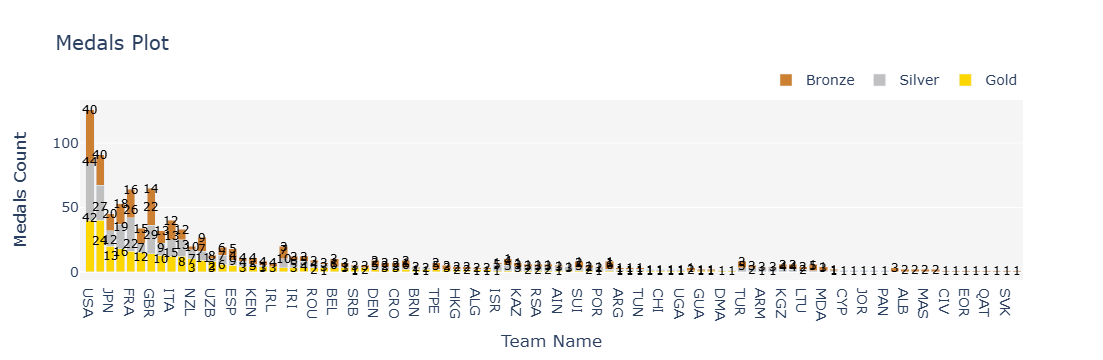

In [34]:
medals_data = medals[['country_code', 'Gold Medal', 'Silver Medal', 'Bronze Medal']]
medals_data = medals_data.set_index('country_code').sort_values(by=['Gold Medal', 'Silver Medal', 'Bronze Medal'], ascending=False)

fig = go.Figure()

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Gold Medal'],
    name='Gold',
    marker_color='#FFD700'
))

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Silver Medal'],
    name='Silver',
    marker_color='#C0C0C0'
))

fig.add_trace(go.Bar(
    x=medals_data.index,
    y=medals_data['Bronze Medal'],
    name='Bronze',
    marker_color='#CD7F32'
))

# Customize layout
fig.update_layout(
    barmode='stack',
    xaxis_title='Team Name',
    yaxis_title='Medals Count',
    title='Medals Plot',
    plot_bgcolor='#f6f5f5',
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    font=dict(size=14),
)

for idx, country in enumerate(medals_data.index):
    for medal, color in zip(['Gold Medal', 'Silver Medal', 'Bronze Medal'], ['#FFD700', '#C0C0C0', '#CD7F32']):
        count = medals_data.at[country, medal]
        if count > 0:
            fig.add_annotation(
                x=country,
                y=sum(medals_data.loc[country, ['Gold Medal', 'Silver Medal', 'Bronze Medal']][medals_data.columns.get_loc(medal):]),
                text=str(count),
                showarrow=False,
                font=dict(color='black', size=12),
                xanchor='center'
            )

fig.show()

#### Conclusion: 


##### In this analysis, various aspects of the Paris 2024 Summer Olympics such as 
     athlete data, 
     country participation, 
     events timeline, and 
     medal distribution. 
Through visualizations and detailed examination, I gained insights into the participation patterns and performance trends of this grand event.


### THANK YOU!